In [1]:
from IPython.display import Image

# 문제 설명

* "명예의 전당"이라는 TV 프로그램에서는 매일 1명의 가수가 노래를 부르고, 시청자들의 문자 투표수로 가수에게 점수를 부여합니다. 매일 출연한 가수의 점수가 지금까지 출연 가수들의 점수 중 상위 k번째 이내이면 해당 가수의 점수를 명예의 전당이라는 목록에 올려 기념합니다. 즉 프로그램 시작 이후 초기에 k일까지는 모든 출연 가수의 점수가 명예의 전당에 오르게 됩니다. k일 다음부터는 출연 가수의 점수가 기존의 명예의 전당 목록의 k번째 순위의 가수 점수보다 더 높으면, 출연 가수의 점수가 명예의 전당에 오르게 되고 기존의 k번째 순위의 점수는 명예의 전당에서 내려오게 됩니다.

* 이 프로그램에서는 매일 "명예의 전당"의 최하위 점수를 발표합니다. 예를 들어, k = 3이고, 7일 동안 진행된 가수의 점수가 [10, 100, 20, 150, 1, 100, 200]이라면, 명예의 전당에서 발표된 점수는 아래의 그림과 같이 [10, 10, 10, 20, 20, 100, 100]입니다.

* 초기에, 1, 2, 6, 7, 8, 9번째 아파트에는 전파가 전달되지 않습니다.

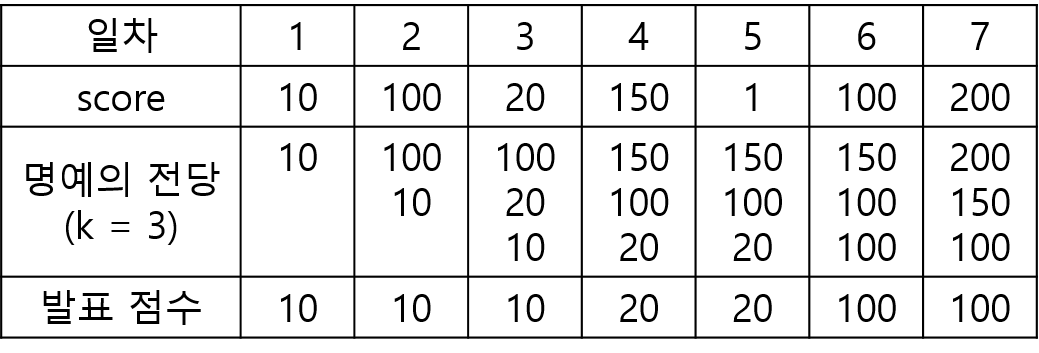

In [2]:
Image('../../../image/명예의전당(1).png', width = 700)

* 명예의 전당 목록의 점수의 개수 k, 1일부터 마지막 날까지 출연한 가수들의 점수인 score가 주어졌을 때, 매일 발표된 명예의 전당의 최하위 점수를 return하는 solution 함수를 완성해주세요.

 # 제한 사항

* 3 ≤ k ≤ 100
* 7 ≤ score의 길이 ≤ 1,000
    * 0 ≤ score[i] ≤ 2,000

# 입출력 예

|k|score|result|
|---|---|---|
|3|[10, 100, 20, 150, 1, 100, 200]|[10, 10, 10, 20, 20, 100, 100]|
|4|[0, 300, 40, 300, 20, 70, 150, 50, 500, 1000]|[0, 0, 0, 0, 20, 40, 70, 70, 150, 300]|

In [3]:
from collections import deque
def solution(k, score):
    answer = []
    hof = []
    
    d_score = deque(score)
    while d_score:
        s = d_score.popleft()
        if len(hof) < k:
            hof.append(s)
            answer.append(min(hof))
        else:
            hof.append(s)
            hof = sorted(hof, reverse=True)
            hof.pop()
            answer.append(hof[-1])

    return answer

In [4]:
for k, score in [[3, [10, 100, 20, 150, 1, 100, 200]], [4, [0, 300, 40, 300, 20, 70, 150, 50, 500, 1000]]] :
    print(solution(k, score))

[10, 10, 10, 20, 20, 100, 100]
[0, 0, 0, 0, 20, 40, 70, 70, 150, 300]


# 풀이 과정 및 주의사항

* pop을 사용하므로 속도가 좀 더 빠른 deque를 사용한다.
* k일 전까지는 가장 낮은 점수를 answer에 추가하면 되고, k일 이후에는 점수를 추가한 뒤 역순으로 정렬하여 가장 작은 수를 빼고(k를 맞추기 위해서) 가장 낮은 수인 마지막 수를 answer에 추가한다.

https://school.programmers.co.kr/learn/courses/30/lessons/138477